In [5]:
%matplotlib inline
import sys
sys.path.append("..")
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

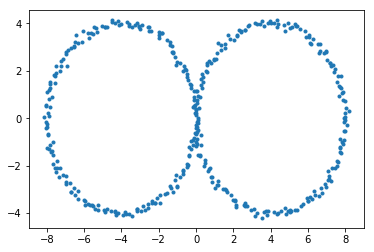

In [93]:
# Create and show two circles with some noise
dataset = (pythd.datagen.DatasetGenerator()
                .circle(center=[-4.0, 0.0], radius=4.0, noise=0.1, num_points=200)
                .circle(center=[4.0, 0.0], radius=4.0, noise=0.1, num_points=200)).get()
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [108]:
# Setup MAPPER
reload(pythd)
reload(pythd.filter)
reload(pythd.cover)
filt = pythd.filter.IdentityFilter()
f_x = filt(dataset)
cover = pythd.cover.IntervalCover.EvenlySpacedFromValues(f_x, 5, 0.5)
clustering = pythd.clustering.HierarchicalClustering()

In [109]:
# Run MAPPER
reload(pythd)
reload(pythd.mapper)
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset, f_x=f_x)

In [110]:
# Create igraph graph
res.compute_k_skeleton(k=1)
g = res.get_igraph_network()
print(g)

IGRAPH UN-- 38 78 --
+ attr: data (v), name (v), points (v), points_orig (v)
+ edges (vertex names):
 0 -- 3, 5, 6                                  23 -- 19, 20, 21
 1 -- 5, 22, 27                                24 -- 21, 22, 27
 2 -- 10, 16, 17                               25 -- 36
 3 -- 0, 5, 6, 13, 15                          26 -- 27, 30, 36
 4 -- 7, 27, 30                                27 -- 1, 4, 5, 7, 21, 22, 24,
26, 29, 30, 36
 5 -- 0, 1, 3, 6, 7, 9, 22, 27, 29             28 -- 33, 36, 37
 6 -- 0, 3, 5, 7, 9, 13, 14, 15, 35            29 -- 5, 7, 27
 7 -- 4, 5, 6, 9, 27, 29, 30                   30 -- 4, 7, 26, 27, 36
 8 -- 32, 34, 35                               31 -- 32, 33
 9 -- 5, 6, 7, 14, 35                          32 -- 8, 31, 34, 35
10 -- 2, 16, 17                                33 -- 28, 31, 36, 37
11 -- 15, 16                                   34 -- 8, 32, 35
12 -- 15                                       35 -- 6, 8, 9, 14, 32, 34
13 -- 3, 6, 15                  

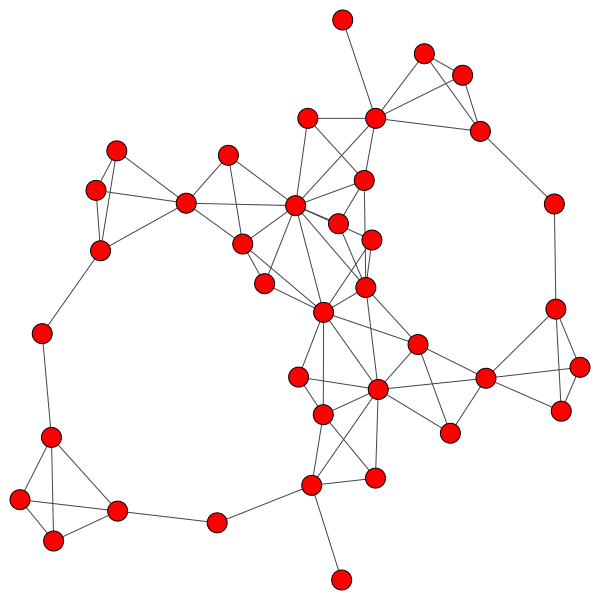

In [111]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)

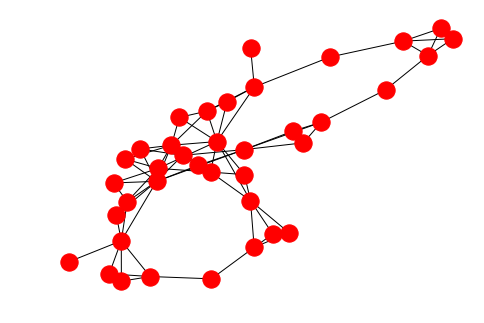

In [112]:
# Visualize with networkx
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

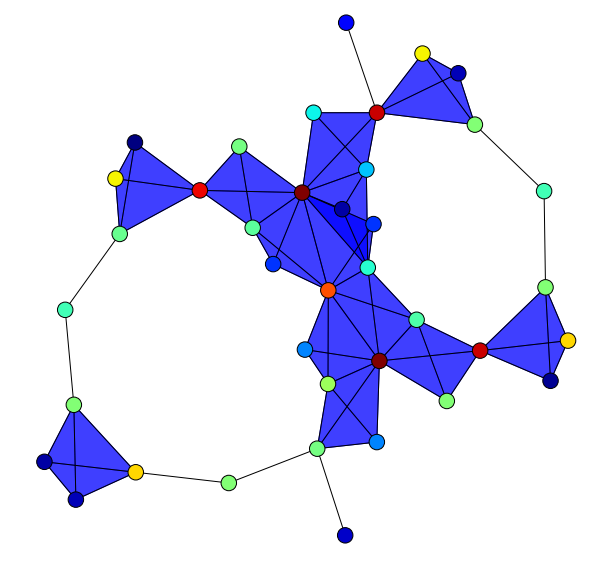

In [113]:
from importlib import reload
import pythd.plotting as plot
reload(plot)
plot.draw_2_skeleton(res.compute_k_skeleton(k=2), layout)